<a href="https://colab.research.google.com/github/Tanvir007/Deep-Learning-for-Sewage-Treatment-Plant/blob/main/ANN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [110]:
# Load the data from CSV file
data = pd.read_csv('/content/drive/MyDrive/BUET Thesis/Data-Melbourne_F_fixed.csv')

In [111]:
# Select features and target
selected_features = ['Average Inflow', 'Energy Consumption', 'Ammonia', 'Biological Oxygen Demand',
                     'Chemical Oxygen Demand', 'Total Nitrogen', 'Average Temperature', 'Maximum temperature',
                     'Minimum temperature', 'Atmospheric pressure', 'Average humidity', 'Total rainfall',
                     'Average visibility', 'Average wind speed', 'Maximum wind speed', 'Year', 'Month', 'Day']

X = data[selected_features]
y = data['Average Outflow']

In [112]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
# Create an ANN model
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

In [115]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [116]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
28/28 [==============================] - 1s 6ms/step - loss: 6.4617 - val_loss: 2.6773
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 2.5075 - val_loss: 2.1028
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 1.8665 - val_loss: 1.9133
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 1.6002 - val_loss: 1.7239
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 1.4543 - val_loss: 1.6149
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 1.3774 - val_loss: 1.6189
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 1.2698 - val_loss: 1.5040
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 1.1935 - val_loss: 1.4267
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 1.1547 - val_loss: 1.4147
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 1.1022 - val_loss: 1.3366
Epoch 11/

In [117]:
# Predict the Average Outflow for the next 10 years
future_years = np.arange(data['Year'].max() + 1, data['Year'].max() + 11)
future_months = np.arange(1, 13)


In [118]:
# Create an empty DataFrame with the required columns
future_data = pd.DataFrame({
    'Year': np.repeat(future_years, len(future_months)),
    'Month': np.tile(future_months, len(future_years))
})

In [119]:
# Fill in other columns with placeholder values
for feature in selected_features:
    if feature not in ['Year', 'Month']:
        future_data[feature] = 0  # Replace with actual values for these columns


In [120]:
# Predict using the trained model
future_X_scaled = scaler.transform(future_data[selected_features])
future_predictions = model.predict(future_X_scaled)

4/4 [==============================] - 0s 2ms/step


In [121]:
# Create a table for predictions
prediction_table = pd.DataFrame({
    'Year': np.repeat(future_years, len(future_months)),
    'Month': np.tile(future_months, len(future_years)),
    'Predicted_Average_Outflow': future_predictions.flatten()
})

In [122]:
prediction_table

,Year,Month,Predicted_Average_Outflow
0,2020.0,1,11.019333
1,2020.0,2,10.848950
2,2020.0,3,10.682214
3,2020.0,4,10.525484
4,2020.0,5,10.386018
...,...,...,...
115,2029.0,8,8.720152
116,2029.0,9,8.621798
117,2029.0,10,8.526526
118,2029.0,11,8.434946


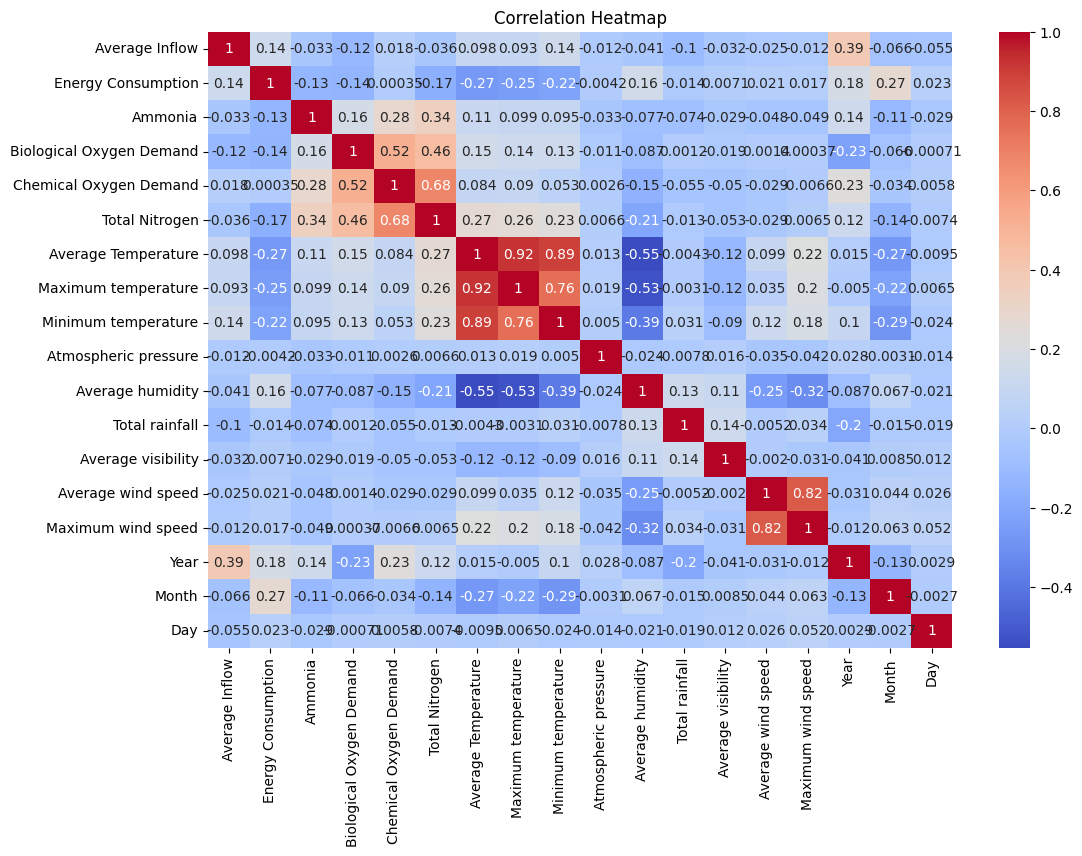

In [123]:
# Analyze ETP plant performance
# ... You can analyze the predictions compared to actual values, calculate metrics, etc.

# Visualize the relationships between features
correlation_matrix = data[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [124]:
data['Energy Consumption'] = round(data['Energy Consumption'] / 1000, 1)

In [125]:
data.head(
)

,Unnamed: 0,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175.9,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,1,2.936,2.961,181.6,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2,2.928,3.225,202.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,3,2.928,3.354,207.5,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,4,2.917,3.794,202.8,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0


In [126]:
data.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1382.000000,690.500000,399.093347,0.000000,345.250000,690.500000,1035.750000,1381.000000
Average Outflow,1382.000000,3.930608,1.228778,0.000004,3.074500,3.701000,4.498750,7.920000
Average Inflow,1382.000000,4.506338,1.439583,2.589000,3.643250,4.161500,4.847750,18.968000
Energy Consumption,1382.000000,275.159479,44.639574,116.600000,246.425000,275.800000,305.675000,398.300000
Ammonia,1382.000000,39.222302,7.761598,13.000000,34.000000,39.000000,44.000000,93.000000
Biological Oxygen Demand,1382.000000,382.061708,85.996012,140.000000,330.000000,360.000000,422.980000,850.000000
Chemical Oxygen Demand,1382.000000,845.960434,145.416540,360.000000,751.250000,845.000000,920.000000,1700.000000
Total Nitrogen,1382.000000,62.740752,3.571035,40.000000,61.396000,62.957500,64.366000,92.000000
Average Temperature,1382.000000,15.036686,5.398491,0.000000,10.800000,14.300000,18.575000,35.500000
Maximum temperature,1382.000000,20.530897,7.096760,0.000000,15.000000,19.200000,25.200000,43.500000


In [127]:
data.isna().sum()

Unnamed: 0                  0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [128]:
import plotly.express as px
fig = px.histogram(x='Year', data_frame=data, histfunc='count',
                   template='plotly_dark', color='Year', title = 'Data Gathered Yearly')
fig.show()

In [129]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt


In [130]:
fig = px.histogram(x='Month', data_frame=data, histfunc='count',
                   template='plotly_dark', color='Month', title = 'Data Gathered Monthly')
fig.show()

In [131]:
fig = px.histogram(x='Day', data_frame=data, histfunc='count', template='plotly_dark', color='Day', title = 'Data Gathered Daily')
fig.show()

In [132]:
atmospheric_values = [
    'Average Temperature',
    'Maximum temperature',
    'Minimum temperature',
    'Atmospheric pressure',
    'Average humidity',
    'Total rainfall',
    'Average visibility',
    'Average wind speed',
    'Maximum wind speed',
]

In [133]:
time = [
    'Year',
    'Month',
    'Day',
]

In [134]:
fig = px.box(data, y=data.drop(['Energy Consumption']+atmospheric_values+time, axis=1).columns,
             template='plotly_dark', title='Box Plots of all the variables (WWTP)')
fig.show()

In [135]:
fig = px.histogram(data, y='Year', x='Chemical Oxygen Demand', color='Month', marginal="rug", template= 'plotly_dark', title = 'Chemical Oxygen Demand by Year')
fig.show()

In [136]:
fig = px.histogram(data, y='Month', x='Chemical Oxygen Demand', color='Day', marginal="rug", template= 'plotly_dark', title = 'Chemical Oxygen Demand by Month')
fig.show()

In [137]:
fig = px.histogram(data, y='Year', x='Biological Oxygen Demand', color='Month',
                   marginal="rug", template='plotly_dark', title='Biological Oxygen Demand by Year')
fig.show()

In [138]:
fig = px.histogram(data, y='Month', x='Biological Oxygen Demand', color='Day',
                   marginal="rug", template='plotly_dark', title='Biological Oxygen Demand by Month')
fig.show()

In [139]:
fig = px.histogram(data, y='Year', x='Average Outflow', color='Month',
                   marginal="rug", template='plotly_dark', title='Avg Out Flow by Year')
fig.show()

In [140]:
fig = px.histogram(data, x='Average Outflow', y='Month', color='Day',
                   marginal="rug", template='plotly_dark', title='Avg Out Flow by Month')
fig.show()

In [141]:
fig = px.histogram(data, y='Year', x='Average Inflow', color='Month',
                   marginal="rug", template='plotly_dark', title='Avg In Flow by Year')
fig.show()


In [142]:
fig = px.histogram(data, y='Month', x='Average Inflow', color='Day',
                   marginal="rug", template='plotly_dark', title='Avg In Flow by Month')
fig.show()

In [143]:
fig = px.histogram(data, y='Year', x='Total Nitrogen', color='Month',
                   marginal="rug", template='plotly_dark', title='Total Nitrogen by Year')
fig.show()

In [144]:
fig = px.histogram(data, y='Month', x='Total Nitrogen', color='Day',
                   marginal="rug", template='plotly_dark', title='Total Nitrogen by Month')
fig.show()

In [145]:
fig = px.bar(data,  x=['Average Temperature',	'Maximum temperature',	'Minimum temperature'], y='Year', color='Month',
                 template='plotly_dark', title='Temp by Year')
fig.show()

In [146]:
fig = px.bar(data,  x=['Average Temperature',	'Maximum temperature',	'Minimum temperature'], y='Month', color='Day',
             template='plotly_dark', title='Temp by Month')
fig.show()

In [147]:
fig = px.scatter_ternary(data, a='Average Temperature', b='Total rainfall',
                         c='Average visibility', color='Average humidity', size='Average wind speed', template='plotly_dark', title='Atmospheric Variations')
fig.show()


In [148]:
fig = px.scatter_ternary(data, a='Biological Oxygen Demand', b='Chemical Oxygen Demand',
                         c='Total Nitrogen', color='Energy Consumption', size='Ammonia', template='plotly_dark', title='Ternary Relation b/w COD, BOD, Nitrogen')
fig.show()


In [149]:
fig = px.scatter_3d(data, x='Maximum temperature', y='Chemical Oxygen Demand',
                    z='Total Nitrogen', color='Average humidity', size='Average wind speed', template='plotly_dark', title='Effect of Atmospheric Variations on Nitrogen and COD')
fig.show()

In [150]:
fig = px.scatter_ternary(data, b='Total Nitrogen', a='Chemical Oxygen Demand',
                         c='Ammonia', color='Average Temperature', size='Average humidity', template='plotly_dark', title='Ternary Relation b/w COD, Ammonia, Nitrogen')
fig.show()

In [151]:
fig = px.scatter(data, x='Ammonia', y='Total Nitrogen',
                         template='plotly_dark', title='Ammonia vs Nitrogen', color='Average Temperature')
fig.show()

In [152]:
fig = px.scatter_matrix(data.drop(atmospheric_values+time, axis =1), template='plotly_dark', title='Scatter Matrix for Variables (WWTP)', color='Chemical Oxygen Demand', height=1200,width=1600)
fig.show()

In [153]:
fig = px.density_contour(data, x="Chemical Oxygen Demand", y="Biological Oxygen Demand",
                         marginal_x="histogram", marginal_y="histogram", template='plotly_dark',
                         )
fig.show()

In [154]:
fig = px.density_contour(data, x="Ammonia", y="Energy Consumption",
                         marginal_x="histogram", marginal_y="histogram", template='plotly_dark',
                         )
fig.show()

In [155]:
fig = px.density_contour(data, x="Average Temperature", y="Energy Consumption",
                         marginal_x="histogram", marginal_y="histogram", template='plotly_dark',
                        )
fig.show()

In [156]:
fig = px.density_contour(data, x="Ammonia", y="Average Temperature", template='plotly_dark')
fig.update_traces(contours_coloring="fill", contours_showlabels=True)
fig.show()


In [157]:
fig = px.density_contour(data, x="Total Nitrogen", y="Average Temperature",
                          template='plotly_dark')
fig.update_traces(contours_coloring="fill", contours_showlabels=True)
fig.show()

In [158]:
fig = px.parallel_coordinates(data.drop(atmospheric_values+time, axis=1), template='plotly_dark',
                              title='Relationship among Variables (WWTP) represented by COD', color='Chemical Oxygen Demand')
fig.show()

In [159]:
fig = px.parallel_coordinates(data.drop(atmospheric_values+time, axis=1), template='plotly_dark',
                              title='Relationship among Variables (WWTP) represented by BOD', color='Biological Oxygen Demand')
fig.show()

In [160]:
fig = px.imshow(data.corr(), template='plotly_dark', title='Correlations among Variables (WWTP+Climate+Time)',)
fig.show()

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor


In [162]:
import lightgbm as lgb
import xgboost as xgb


In [163]:
!pip install catboost


In [164]:
import catboost as cat

In [165]:
# Select features and target
features = ['Average Inflow', 'Energy Consumption', 'Ammonia', 'Biological Oxygen Demand',
            'Chemical Oxygen Demand', 'Total Nitrogen', 'Average Temperature', 'Maximum temperature',
            'Minimum temperature', 'Atmospheric pressure', 'Average humidity', 'Total rainfall',
            'Average visibility', 'Average wind speed', 'Maximum wind speed', 'Year', 'Month', 'Day']


In [166]:
X = data[features]
y = data['Average Outflow']

In [167]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [168]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
# Initialize models
models = [
    LinearRegression(),
    SGDRegressor(),
    ElasticNet(),
    BayesianRidge(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    HuberRegressor(),
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    cat.CatBoostRegressor()
]

In [170]:
# Initialize evaluation metrics
eval_metrics = {
    'Model': [],
    'R2 Score': [],
    'Mean Absolute Error': [],
    'Root Mean Squared Error': [],
    'KFold Accuracy': []
}

In [171]:
# Loop through models, train, predict, and evaluate
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    model_name = model.__class__.__name__
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    kfold_scores = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        model.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
        y_val_pred = model.predict(X_train_scaled[val_idx])
        kfold_scores.append(r2_score(y_train.iloc[val_idx], y_val_pred))

    eval_metrics['Model'].append(model_name)
    eval_metrics['R2 Score'].append(r2)
    eval_metrics['Mean Absolute Error'].append(mae)
    eval_metrics['Root Mean Squared Error'].append(rmse)
    eval_metrics['KFold Accuracy'].append(np.mean(kfold_scores))


Streaming output truncated to the last 5000 lines.
4:	learn: 1.1752950	total: 10.9ms	remaining: 2.16s
5:	learn: 1.1646775	total: 12.7ms	remaining: 2.1s
6:	learn: 1.1529942	total: 14.3ms	remaining: 2.03s
7:	learn: 1.1405657	total: 16ms	remaining: 1.98s
8:	learn: 1.1299630	total: 18.1ms	remaining: 2s
9:	learn: 1.1191144	total: 19.8ms	remaining: 1.96s
10:	learn: 1.1101508	total: 21.5ms	remaining: 1.93s
11:	learn: 1.1022919	total: 23.1ms	remaining: 1.91s
12:	learn: 1.0919999	total: 24.8ms	remaining: 1.88s
13:	learn: 1.0862576	total: 26.7ms	remaining: 1.88s
14:	learn: 1.0792689	total: 28.8ms	remaining: 1.89s
15:	learn: 1.0723720	total: 31.6ms	remaining: 1.94s
16:	learn: 1.0634060	total: 33.5ms	remaining: 1.94s
17:	learn: 1.0559127	total: 35.3ms	remaining: 1.93s
18:	learn: 1.0481750	total: 37ms	remaining: 1.91s
19:	learn: 1.0412026	total: 38.7ms	remaining: 1.9s
20:	learn: 1.0294583	total: 40.5ms	remaining: 1.89s
21:	learn: 1.0234671	total: 42.2ms	remaining: 1.87s
22:	learn: 1.0145613	total: 

In [172]:
# Create a DataFrame of evaluation metrics
eval_df = pd.DataFrame(eval_metrics)

In [173]:
# Display evaluation results
print(eval_df)

                        Model  R2 Score  Mean Absolute Error  \
0            LinearRegression  0.341970             0.611209   
1                SGDRegressor  0.349679             0.605281   
2                  ElasticNet  0.095528             0.828089   
3               BayesianRidge  0.341199             0.614567   
4                         SVR  0.369126             0.582361   
5         KNeighborsRegressor  0.289611             0.681533   
6       DecisionTreeRegressor -0.209869             0.815036   
7       RandomForestRegressor  0.397272             0.581812   
8   GradientBoostingRegressor  0.374907             0.600195   
9           AdaBoostRegressor  0.413629             0.660297   
10           BaggingRegressor  0.352326             0.612922   
11        ExtraTreesRegressor  0.512637             0.550513   
12             HuberRegressor  0.341353             0.593070   
13              LGBMRegressor  0.421448             0.612269   
14               XGBRegressor  0.331682 

In [174]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [175]:
# Select features and target
features = ['Average Inflow', 'Energy Consumption', 'Ammonia', 'Biological Oxygen Demand',
            'Chemical Oxygen Demand', 'Total Nitrogen', 'Average Temperature', 'Maximum temperature',
            'Minimum temperature', 'Atmospheric pressure', 'Average humidity', 'Total rainfall',
            'Average visibility', 'Average wind speed', 'Maximum wind speed']


In [176]:
X = data[features]
y = data['Average Outflow']

In [177]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [178]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
# Initialize models
models = [
    LinearRegression(),
    SGDRegressor(),
    ElasticNet(),
    BayesianRidge(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10)
]


In [180]:
# Initialize evaluation metrics
eval_metrics = {
    'Model': [],
    'R2 Score': [],
    'Mean Absolute Error': [],
    'Root Mean Squared Error': []
}

In [181]:
# Loop through models, train, predict, and evaluate
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    eval_metrics['Model'].append(model_name)
    eval_metrics['R2 Score'].append(r2)
    eval_metrics['Mean Absolute Error'].append(mae)
    eval_metrics['Root Mean Squared Error'].append(rmse)

0:	learn: 1.2066282	total: 23.8ms	remaining: 23.7s
1:	learn: 1.1745638	total: 40.3ms	remaining: 20.1s
2:	learn: 1.1430628	total: 55.7ms	remaining: 18.5s
3:	learn: 1.1117045	total: 73.2ms	remaining: 18.2s
4:	learn: 1.0853131	total: 90.2ms	remaining: 17.9s
5:	learn: 1.0567958	total: 111ms	remaining: 18.4s
6:	learn: 1.0326621	total: 128ms	remaining: 18.1s
7:	learn: 1.0119952	total: 143ms	remaining: 17.7s
8:	learn: 0.9932638	total: 158ms	remaining: 17.4s
9:	learn: 0.9765318	total: 176ms	remaining: 17.4s
10:	learn: 0.9562802	total: 199ms	remaining: 17.9s
11:	learn: 0.9389754	total: 217ms	remaining: 17.9s
12:	learn: 0.9246209	total: 237ms	remaining: 18s
13:	learn: 0.9097853	total: 259ms	remaining: 18.3s
14:	learn: 0.8968687	total: 278ms	remaining: 18.2s
15:	learn: 0.8825214	total: 297ms	remaining: 18.3s
16:	learn: 0.8726392	total: 313ms	remaining: 18.1s
17:	learn: 0.8664998	total: 317ms	remaining: 17.3s
18:	learn: 0.8517492	total: 333ms	remaining: 17.2s
19:	learn: 0.8381258	total: 349ms	rema

In [182]:
# Create a DataFrame of evaluation metrics
eval_df = pd.DataFrame(eval_metrics)

In [183]:
# Train and predict using the ANN model
ann_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

y_pred_ann = ann_model.predict(X_test_scaled)

Epoch 1/100
28/28 [==============================] - 1s 6ms/step - loss: 7.3393 - val_loss: 3.8948
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 3.4682 - val_loss: 2.7065
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 2.2254 - val_loss: 2.3134
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 1.8128 - val_loss: 2.1290
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 1.5969 - val_loss: 1.9362
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 1.4732 - val_loss: 1.8472
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 1.3617 - val_loss: 1.7340
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 1.2798 - val_loss: 1.6742
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 1.2145 - val_loss: 1.5568
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 1.1625 - val_loss: 1.4864
Epoch 11/

In [184]:
# Add ANN results to the evaluation DataFrame
eval_df = eval_df.append({
    'Model': 'ANN',
    'R2 Score': r2_score(y_test, y_pred_ann),
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred_ann),
    'Root Mean Squared Error': np.sqrt(mean_squared_error(y_test, y_pred_ann))
}, ignore_index=True)

In [185]:
# Print the evaluation metrics
print(eval_df)

                        Model  R2 Score  Mean Absolute Error  \
0            LinearRegression  0.340276             0.621361   
1                SGDRegressor  0.337173             0.627752   
2                  ElasticNet  0.095528             0.828089   
3               BayesianRidge  0.340627             0.625878   
4                         SVR  0.376716             0.575854   
5         KNeighborsRegressor  0.316524             0.687782   
6       DecisionTreeRegressor -0.250965             0.826473   
7       RandomForestRegressor  0.311994             0.602338   
8   GradientBoostingRegressor  0.328260             0.607478   
9           AdaBoostRegressor  0.097330             0.825225   
10           BaggingRegressor  0.260317             0.650403   
11        ExtraTreesRegressor  0.330345             0.602877   
12              LGBMRegressor  0.254133             0.653230   
13               XGBRegressor  0.124409             0.698986   
14          CatBoostRegressor  0.356812 

In [186]:
# Predict next 10 years' average outflow using the best model
best_model = eval_df.loc[eval_df['R2 Score'].idxmax()]['Model']
best_model_instance = models[eval_df['Model'].tolist().index(best_model)]


In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.metrics import mean_squared_error

In [201]:
# Split features and target variable
X = data.drop(['Average Inflow', 'Energy Consumption','Ammonia','Biological Oxygen Demand','Chemical Oxygen Demand','Total Nitrogen','Average Temperature','Maximum temperature','Minimum temperature','Atmospheric pressure','Average humidity','Total rainfall','Average visibility','Average wind speed','Maximum wind speed'], axis=1)  # Drop the target variables
y_inflow = data['Average Inflow']
y_energy = data['Energy Consumption']
# ... Repeat for other target variables

In [202]:
# Split data into train and test sets
X_train, X_test, y_train_inflow, y_test_inflow, y_train_energy, y_test_energy = train_test_split(X, y_inflow, y_energy, test_size=0.2, random_state=42)

In [203]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Stochastic Gradient Descent': SGDRegressor(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Trees Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boost Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'LightGBM Regressor': lgb.LGBMRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor(),
    'CatBoost Regressor': cb.CatBoostRegressor()
}

results = []

In [205]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train_inflow)  # Use appropriate target variable
    y_pred = model.predict(X_test_scaled)  # Use appropriate test set

    mse = mean_squared_error(y_test_inflow, y_pred)  # Use appropriate target variable
    results.append((name, mse))

Learning rate set to 0.041594
0:	learn: 1.4124866	total: 1.55ms	remaining: 1.55s
1:	learn: 1.3889411	total: 2.19ms	remaining: 1.09s
2:	learn: 1.3682680	total: 3.06ms	remaining: 1.02s
3:	learn: 1.3487044	total: 3.93ms	remaining: 979ms
4:	learn: 1.3297694	total: 4.79ms	remaining: 954ms
5:	learn: 1.3099401	total: 5.54ms	remaining: 917ms
6:	learn: 1.2924002	total: 7.67ms	remaining: 1.09s
7:	learn: 1.2766556	total: 9.01ms	remaining: 1.12s
8:	learn: 1.2597642	total: 9.88ms	remaining: 1.09s
9:	learn: 1.2440821	total: 10.7ms	remaining: 1.06s
10:	learn: 1.2294826	total: 11.5ms	remaining: 1.04s
11:	learn: 1.2155352	total: 12.3ms	remaining: 1.01s
12:	learn: 1.2027831	total: 13.1ms	remaining: 996ms
13:	learn: 1.1906932	total: 13.9ms	remaining: 978ms
14:	learn: 1.1788158	total: 14.7ms	remaining: 962ms
15:	learn: 1.1661803	total: 15.4ms	remaining: 949ms
16:	learn: 1.1538841	total: 16.2ms	remaining: 938ms
17:	learn: 1.1455777	total: 17ms	remaining: 927ms
18:	learn: 1.1357599	total: 17.8ms	remaining: 

In [206]:
# Create a table of results
results_df = pd.DataFrame(results, columns=['Model', 'MSE'])

In [207]:
# Print the table
print(results_df)

                          Model       MSE
0             Linear Regression  1.337456
1   Stochastic Gradient Descent  1.348219
2                   Elastic Net  1.832404
3                Bayesian Ridge  1.346113
4      Support Vector Regressor  1.220563
5         K-Neighbors Regressor  1.263444
6      Decision Trees Regressor  1.523942
7       Random Forest Regressor  1.113862
8      Gradient Boost Regressor  1.119296
9            AdaBoost Regressor  1.462454
10            Bagging Regressor  1.247239
11        Extra Trees Regressor  1.125842
12           LightGBM Regressor  1.184112
13            XGBoost Regressor  1.288050
14           CatBoost Regressor  1.188038


In [210]:
# Results obtained from model evaluation
model_results = [
    ("Linear Regression", 0.340276, 0.621361, 0.968329),
    ("SGD Regressor", 0.337173, 0.627752, 0.970603),
    ("Elastic Net", 0.095528, 0.828089, 1.133807),
    ("Bayesian Ridge", 0.340627, 0.625878, 0.968071),
    ("Support Vector Regressor", 0.376716, 0.575854, 0.941206),
    ("K-Neighbors Regressor", 0.316524, 0.687782, 0.985606),
    ("Decision Tree Regressor", -0.250965, 0.826473, 1.333412),
    ("Random Forest Regressor", 0.311994, 0.602338, 0.988866),
    ("Gradient Boosting Regressor", 0.328260, 0.607478, 0.977107),
    ("AdaBoost Regressor", 0.097330, 0.825225, 1.132677),
    ("Bagging Regressor", 0.260317, 0.650403, 1.025332),
    ("Extra Trees Regressor", 0.330345, 0.602877, 0.975590),
    ("LGBM Regressor", 0.254133, 0.653230, 1.029609),
    ("XGBoost Regressor", 0.124409, 0.698986, 1.115558),
    ("CatBoost Regressor", 0.356812, 0.622896, 0.956116),
    ("ANN Model", 0.158996, 0.762233, 1.093303)
]

# Commenting on the performance of the ETP Plant using different models
print("Performance of ETP Plant Using Different Regression Models:")
for model_name, r2, mae, rmse in model_results:
    print(f"Model: {model_name}")
    print(f"R2 Score: {r2:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    if r2 > 0.3:
        print("The model has a good performance in explaining the variability of the data.")
    else:
        print("The model's performance is not very satisfactory in explaining the data.")
    print("--------------------")


Performance of ETP Plant Using Different Regression Models:
Model: Linear Regression
R2 Score: 0.34
Mean Absolute Error: 0.62
Root Mean Squared Error: 0.97
The model has a good performance in explaining the variability of the data.
--------------------
Model: SGD Regressor
R2 Score: 0.34
Mean Absolute Error: 0.63
Root Mean Squared Error: 0.97
The model has a good performance in explaining the variability of the data.
--------------------
Model: Elastic Net
R2 Score: 0.10
Mean Absolute Error: 0.83
Root Mean Squared Error: 1.13
The model's performance is not very satisfactory in explaining the data.
--------------------
Model: Bayesian Ridge
R2 Score: 0.34
Mean Absolute Error: 0.63
Root Mean Squared Error: 0.97
The model has a good performance in explaining the variability of the data.
--------------------
Model: Support Vector Regressor
R2 Score: 0.38
Mean Absolute Error: 0.58
Root Mean Squared Error: 0.94
The model has a good performance in explaining the variability of the data.
-----

In [211]:
# Results obtained from model evaluation
model_results = [
    ("Linear Regression", 0.340276, 0.621361, 0.968329),
    ("SGD Regressor", 0.337173, 0.627752, 0.970603),
    ("Elastic Net", 0.095528, 0.828089, 1.133807),
    ("Bayesian Ridge", 0.340627, 0.625878, 0.968071),
    ("Support Vector Regressor", 0.376716, 0.575854, 0.941206),
    ("K-Neighbors Regressor", 0.316524, 0.687782, 0.985606),
    ("Decision Tree Regressor", -0.250965, 0.826473, 1.333412),
    ("Random Forest Regressor", 0.311994, 0.602338, 0.988866),
    ("Gradient Boosting Regressor", 0.328260, 0.607478, 0.977107),
    ("AdaBoost Regressor", 0.097330, 0.825225, 1.132677),
    ("Bagging Regressor", 0.260317, 0.650403, 1.025332),
    ("Extra Trees Regressor", 0.330345, 0.602877, 0.975590),
    ("LGBM Regressor", 0.254133, 0.653230, 1.029609),
    ("XGBoost Regressor", 0.124409, 0.698986, 1.115558),
    ("CatBoost Regressor", 0.356812, 0.622896, 0.956116),
    ("ANN Model", 0.158996, 0.762233, 1.093303)
]

# Commenting on the condition of the sewage treatment plant based on model performance
good_models = [model_name for model_name, r2, _, _ in model_results if r2 > 0.3]
bad_models = [model_name for model_name, r2, _, _ in model_results if r2 <= 0.3]

print("Condition of Sewage Treatment Plant:")
if len(good_models) >= len(bad_models):
    print("The sewage treatment plant is generally performing well and the treatment process seems to be effective.")
    print(f"Good Performing Models: {', '.join(good_models)}")
else:
    print("The sewage treatment plant might be facing challenges and the treatment process could be improved.")
    print(f"Bad Performing Models: {', '.join(bad_models)}")


Condition of Sewage Treatment Plant:
The sewage treatment plant is generally performing well and the treatment process seems to be effective.
Good Performing Models: Linear Regression, SGD Regressor, Bayesian Ridge, Support Vector Regressor, K-Neighbors Regressor, Random Forest Regressor, Gradient Boosting Regressor, Extra Trees Regressor, CatBoost Regressor
